# 4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）


https://github.com/ChannelCMT/formula/wiki

数据类型和周期自定


In [26]:
#观察因子alpha101中的alpha004
import warnings
warnings.filterwarnings('ignore')

In [27]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance' ,
         'freq': '1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
print(time()-start)

5.431984901428223


In [28]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv = HFDataView()

In [29]:
dv.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [30]:
import matplotlib.pyplot as plt

def plot_chart(close,alpha):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,8))
    ax.plot(close.iloc[-250:])
    ax1.plot(alpha.iloc[-250:])
    # plt.savefig('good')
    plt.show()

In [31]:
def RankPct(df):
    return df.rank(axis=1, pct=True)

In [32]:
alpha4=dv.add_formula('alpha4_C','-1*Ts_Rank(RankPct(low),9)',add_data=True,register_funcs={'RankPct':RankPct})
alpha4_change=dv.add_formula('alpha4_C','Ts_Rank(low,9)',add_data=True,register_funcs={'RankPct':RankPct})

Field [alpha4_C] is overwritten.


In [33]:
alpha4_plot = dv.get_ts('alpha4_C', date_type='datetime')
close = dv.get_ts('close', date_type='datetime')

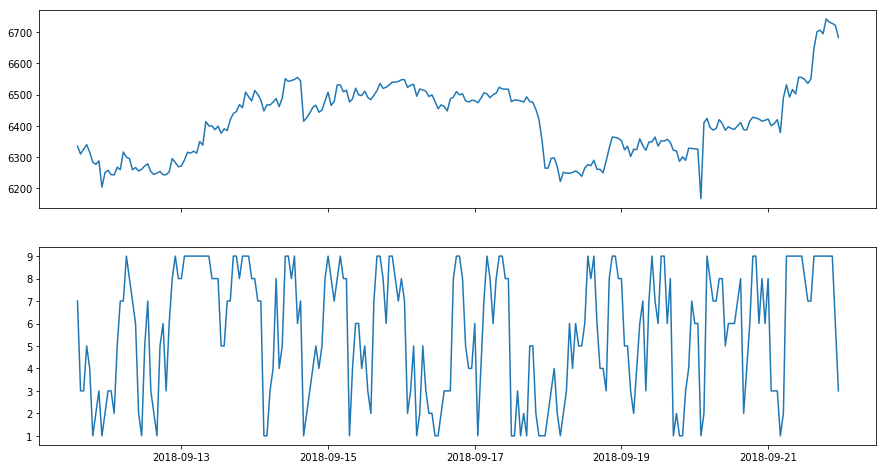

In [34]:
plot_chart(close, alpha4_plot)

观察因子alpha101中的alpha004
其与价格之间存在关系
可以看出价格的涨跌与alpha004的变化趋势基本相同

In [10]:
#观察技术因子RSI
import warnings
warnings.filterwarnings('ignore')

In [11]:
from jaqs_fxdayu.data.dataservice import LocalDataService
ds = LocalDataService()
from time import time
## 加freq参数

start = time()
path = r'./min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance' ,
         'freq': '1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据
print(time()-start)

5.13810920715332


In [12]:
from jaqs_fxdayu.data.hf_dataview import HFDataView
dv1H = HFDataView()

In [13]:
dv1H.create_init_dv(Time_dict.set_index(["trade_date","symbol"]))

Initialize dataview success.


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def Plot_Mean(dv, RSI_J, chart_name='dv_RSI', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(RSI_J.iloc[n:], alpha=1)
        
    # plt.savefig(chart_name)
    plt.show()


In [19]:
dv1H.add_formula('Ui', """If(close>Delay(close, 1),close-Delay(close, 1),If(close<Delay(close, 1), 0, 0))""", add_data=True)
dv1H.add_formula('Di',"""If(close>Delay(close, 1),0,If(close<Delay(close, 1), Delay(close, 1)-close, 0))""", add_data=True)
RSI = dv1H.add_formula('RSI_J',
                         "100-100/(1+(Ta('MA',0,Ui,Ui,Ui,Ui,Ui,12)/Ta('MA',0,Di,Di,Di,Di,Di,12)))" ,
                          add_data=True)

In [20]:
RSI_J = dv1H.get_ts('RSI_J', date_type='datetime')

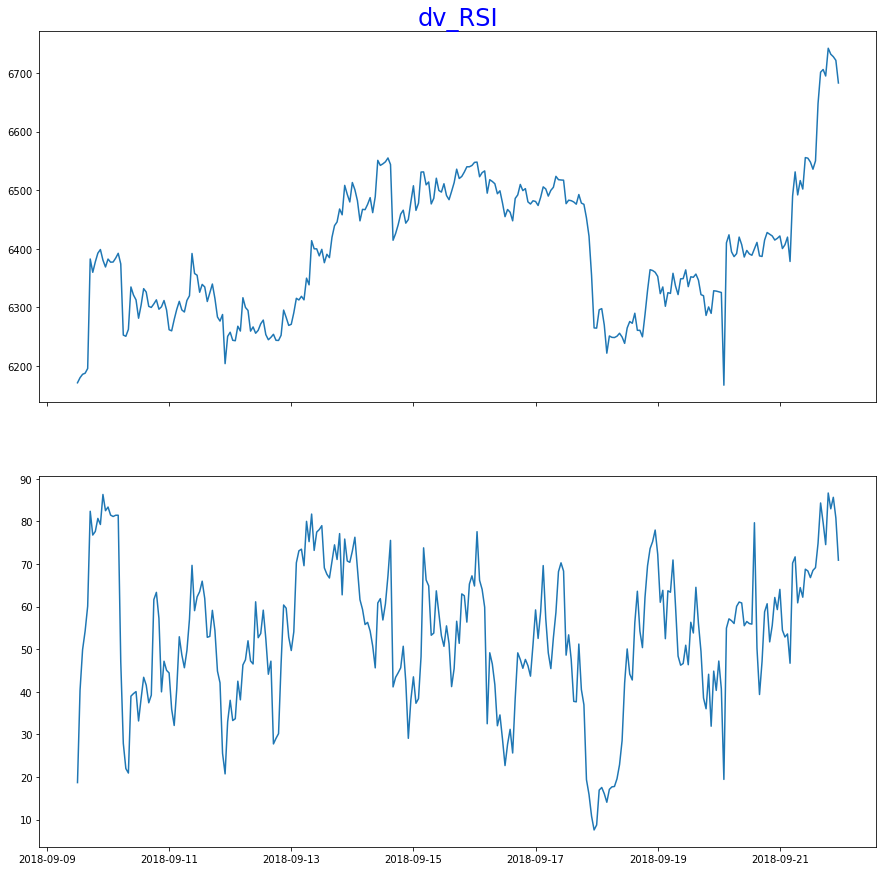

In [46]:
Plot_Mean(dv1H, RSI_J.iloc[:,0], n=-300)

观察技术因子RSI
RSI的取值范围为0-100，当RSI向上穿过70时，之后的价格普遍会下跌，当RSI向下穿过30时，之后的价格普遍会上涨

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

1、alpha101中的alpha004
价格的涨跌与alpha004的变化趋势基本相同
进场信号：alpha004增幅超过6
出场信号：alpha004减幅超过6

2、技术指标RSI
价格的涨跌和RSI指标数值的变化有关
进场信号：RSI向下穿过30
出场信号：RSI向上穿过70